## Timing Function Calls

In [9]:
import numpy as np

In [5]:
import numpy.random as npr
def series_pi( n ):
    result = 0
    for k in range( 1,n ):
        term = ( ( -1 ) ** ( k+1 ) ) / ( 2 * k - 1 )
        result += term
    return result*4

In [6]:
%timeit  series_pi( int(1e5) )

35.6 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Locating Function Zeroes

### Newton's method

In [7]:
def dfdx( f,x,h=1e-3 ):
    return ( f( x+h ) - f( x ) ) / h

def newton( f,x0,tol=1e-3 ):
    d = abs( 0 - f( x0 ) )
    while d > tol:
        x0 = x0 - f( x0 ) / dfdx( f,x0 )
        d = abs( 0 - f( x0 ) )
    return ( x0,f( x0 ) )

In [10]:
def eqn( x ):
    '''
    Represent the equation cos(x) + 2 = x^3 - x^2
    '''
    return ( np.cos( x ) + 2 ) - ( x**3 - x**2 )

newton( eqn,0 )

(1.6753617365950546, -5.238065699630923e-06)

## Locating Function Minima

### scipy.optimize.minimize( f,x0 )

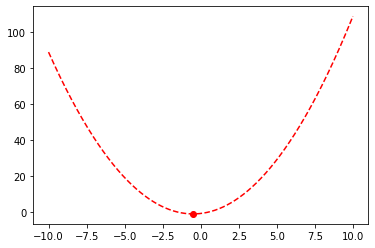

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def f( x ):
    return x**2 + x - 1

x = np.linspace( -10,10,1000 )
xstar = scipy.optimize.minimize( f,x0=3 )

plt.plot( x,f( x ),'r--', xstar[ 'x' ],f( xstar[ 'x' ] ),'ro' )
plt.show()

In [38]:
def f( x ):
    return -x**(1/x)

x = np.linspace( 0,1000000,1000000 )
xstar = scipy.optimize.minimize( f,x0=1 )

In [39]:
xstar['x']

array([2.71817479])

### Check Collinearity of Three Points 验证三点共线

In [41]:
def col_area( x1,y1,x2,y2,x3,y3 ):
    col = np.isclose( ( x1-x3 ) * ( y2 - y3 ),( x2-x3 ) * ( y1-y3 ) )
    return col